# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

# **Data set**

### Montamos data set Train

In [ ]:
## Cargamos las librerias que necesitaremos
!pip install --upgrade scikit-learn
!pip install --upgrade scikit-learn-intelex
import pickle
import seaborn as sb
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install missingpy
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from google.colab import drive
from sklearn.pipeline import Pipeline
from sklearn import datasets
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
!pip install catboost
!pip install xgboost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from google.colab import files
from sklearn.ensemble import StackingClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_

In [ ]:
## Montamos el Drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los datos de entrenamiento que vamos a utilizar para generar nuestro modelo.

In [ ]:
#Ruta
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AS/diabetes_prediction_dataset_train-labeled.csv')

### Curación de datos en la base Train

In [ ]:
print(train_df.shape)
print(train_df.describe())

(95000, 10)
             patient           age  hypertension  heart_disease           bmi  \
count   95000.000000  95000.000000  95000.000000   95000.000000  95000.000000   
mean    50016.501389     41.935269      0.075074       0.039463     27.320879   
std     28868.357071     22.514788      0.263512       0.194695      6.626335   
min         1.000000      0.080000      0.000000       0.000000     10.010000   
25%     25021.750000     24.000000      0.000000       0.000000     23.650000   
50%     50024.000000     43.000000      0.000000       0.000000     27.320000   
75%     75024.250000     60.000000      0.000000       0.000000     29.580000   
max    100000.000000     80.000000      1.000000       1.000000     95.690000   

        HbA1c_level  blood_glucose_level      diabetes  
count  95000.000000         95000.000000  95000.000000  
mean       5.527659           138.070537      0.085074  
std        1.070261            40.739962      0.278993  
min        3.500000           

In [ ]:
train_df.head()

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,20432,Male,4.0,0,0,never,19.28,3.5,155,0
1,49682,Female,50.0,0,0,former,27.32,5.7,159,0
2,73886,Female,43.0,0,0,never,21.54,4.5,145,0
3,53144,Male,64.0,0,0,current,28.22,6.0,130,0
4,98507,Male,10.0,0,0,No Info,15.46,6.1,140,0


In [ ]:
list(train_df.columns)

['patient',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [ ]:
#Veamos que tipo de variables tiene el data set
for column in train_df.columns:
  if train_df[column].dtype == 'object':
    print(f"Variable '{column}' es categórica. Categorías: {train_df[column].unique()}")
  elif train_df[column].dtype in ['int64', 'float64']:
    if len(train_df[column].unique()) < 10:  # Asumiendo que si hay menos de 10 valores únicos, es discreta
      print(f"Variable '{column}' es numérica discreta. Clases: {train_df[column].unique()}")
    else:
      print(f"Variable '{column}' es numérica continua.")


Variable 'patient' es numérica continua.
Variable 'gender' es categórica. Categorías: ['Male' 'Female' 'Other']
Variable 'age' es numérica continua.
Variable 'hypertension' es numérica discreta. Clases: [0 1]
Variable 'heart_disease' es numérica discreta. Clases: [0 1]
Variable 'smoking_history' es categórica. Categorías: ['never' 'former' 'current' 'No Info' 'not current' 'ever']
Variable 'bmi' es numérica continua.
Variable 'HbA1c_level' es numérica continua.
Variable 'blood_glucose_level' es numérica continua.
Variable 'diabetes' es numérica discreta. Clases: [0 1]


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient              95000 non-null  int64  
 1   gender               95000 non-null  object 
 2   age                  95000 non-null  float64
 3   hypertension         95000 non-null  int64  
 4   heart_disease        95000 non-null  int64  
 5   smoking_history      95000 non-null  object 
 6   bmi                  95000 non-null  float64
 7   HbA1c_level          95000 non-null  float64
 8   blood_glucose_level  95000 non-null  int64  
 9   diabetes             95000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.2+ MB


In [ ]:
#Convertir la variable blood_glucose_level a float64
train_df['blood_glucose_level'] = train_df['blood_glucose_level'].astype('float64')

<Axes: >

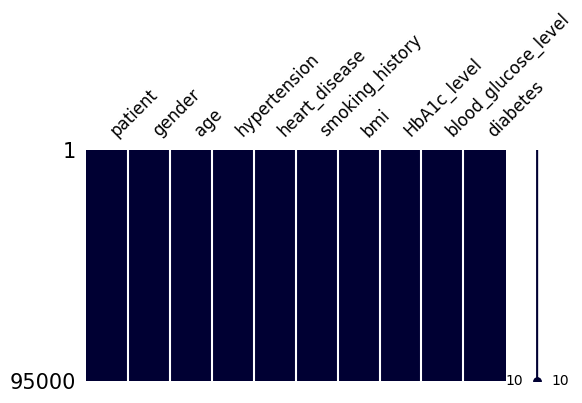

In [ ]:
msno.matrix(train_df,figsize=(6, 3), fontsize=12, color=[0,0,0.2])

La columna ***`diabetes`*** es la columna que debemos predecir. Tener en cuenta que en el dataset de Test esta columna tiene valores nulos.

**Diabetes**

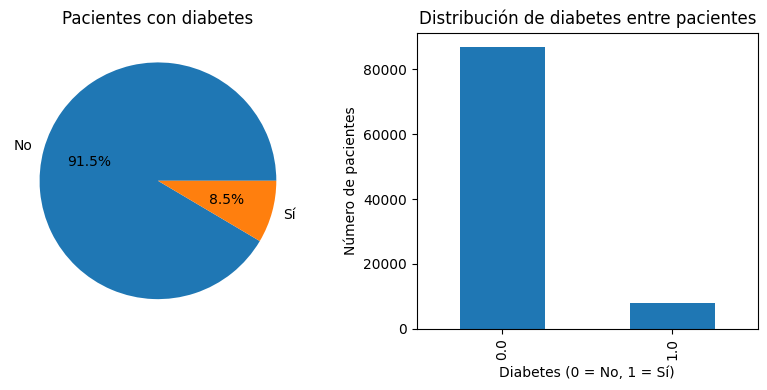

In [ ]:
# Exploramos la variable a predecir DIABETES

# Crearmos una figura con una fila y dos columnas
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Primer gráfico: Pie chart
axs[0].pie(train_df.diabetes.value_counts(), labels=['No', 'Sí'], autopct='%1.1f%%')
axs[0].set_title('Pacientes con diabetes')
# Segundo gráfico: Bar plot
train_df.groupby("patient").diabetes.mean().value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Distribución de diabetes entre pacientes')
axs[1].set_xlabel('Diabetes (0 = No, 1 = Sí)')
axs[1].set_ylabel('Número de pacientes')
# Ajustar el espacio entre gráficos
plt.tight_layout()
# Mostrar los gráficos
plt.show()

Se observa un desbalance significativo en las clases de la variable objetivo. La clase "No diabetes" (clase 0) cuenta con un mayor número de muestras en comparación con la clase "Diabetes" (clase 1). Este desbalance en la cantidad de casos puede impactar negativamente el desempeño del modelo predictivo para la diabetes.

Específicamente, este desbalance puede resultar en una alta precisión para la clase mayoritaria, pero con una precisión y un recall reducidos para la clase minoritaria. Esto sugiere que el modelo podría tener dificultades para identificar correctamente los casos de diabetes, que son de particular interés en este análisis.

Para mitigar este problema, implementaremos diferentes modelos como Regresión Logística y exploraremos técnicas basadas en árboles de decisión, así como algoritmos de boosting como XGBoost y AdaBoost. Estos enfoques tienen la ventaja de ajustar el peso asignado a la clase minoritaria en cada iteración, lo que ayuda a mejorar la detección de la clase de interés.

**Exploración de variables**

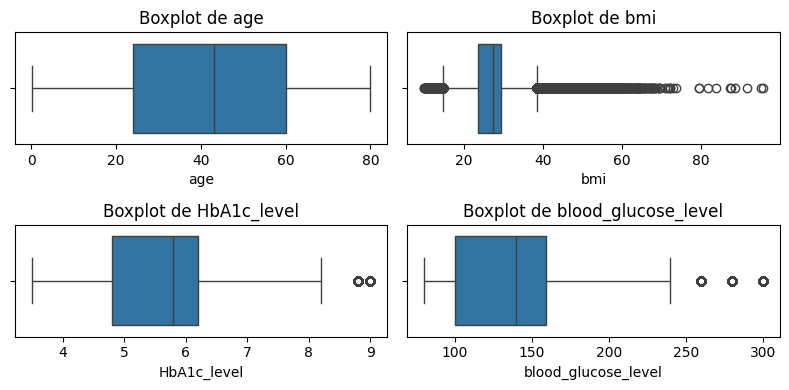

In [ ]:
# Identificamos variables numéricas continuas

numeric_cols = train_df.select_dtypes(include=['float']).columns
# Crear un boxplot para cada variable numérica continua en una matriz 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,4))
# Aplanar el array de axes para iterar fácilmente sobre ellos
axes = axes.flatten()
# Iterar sobre cada columna numérica y dibujar el boxplot en la matriz
for i, col in enumerate(numeric_cols):
    sb.boxplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
# Ajustar automáticamente la disposición de los gráficos
plt.tight_layout()
plt.show()


Se han identificado valores atípicos en las variables bmi, HbA1c_level y blood_glucose_level. Sin embargo, antes de tomar decisiones definitivas sobre estos datos, procederemos a analizar cómo estas variables se relacionan con la presencia de diabetes. Para ello, utilizaremos una serie de gráficos que nos permitirán explorar la distribución y el impacto de estos valores atípicos en el contexto de la variable objetivo "Diabetes".

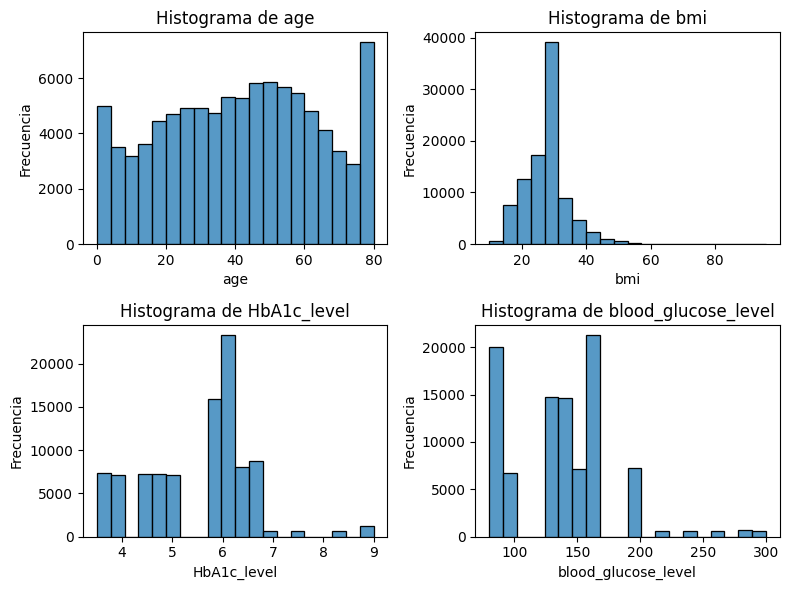

In [ ]:
# Identificar variables numéricas continuas
numeric_cols = train_df.select_dtypes(include=['float']).columns
# Crear un histograma para cada variable numérica continua en una matriz 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
# Aplanar el array de axes para iterar fácilmente sobre ellos
axes = axes.flatten()
# Iterar sobre cada columna numérica y dibujar el histograma en la matriz
for i, col in enumerate(numeric_cols):
    sb.histplot(train_df[col], ax=axes[i], bins=20)  # Ajusta 'bins' según sea necesario
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
# Ajustar automáticamente la disposición de los gráficos
plt.tight_layout()
plt.show()

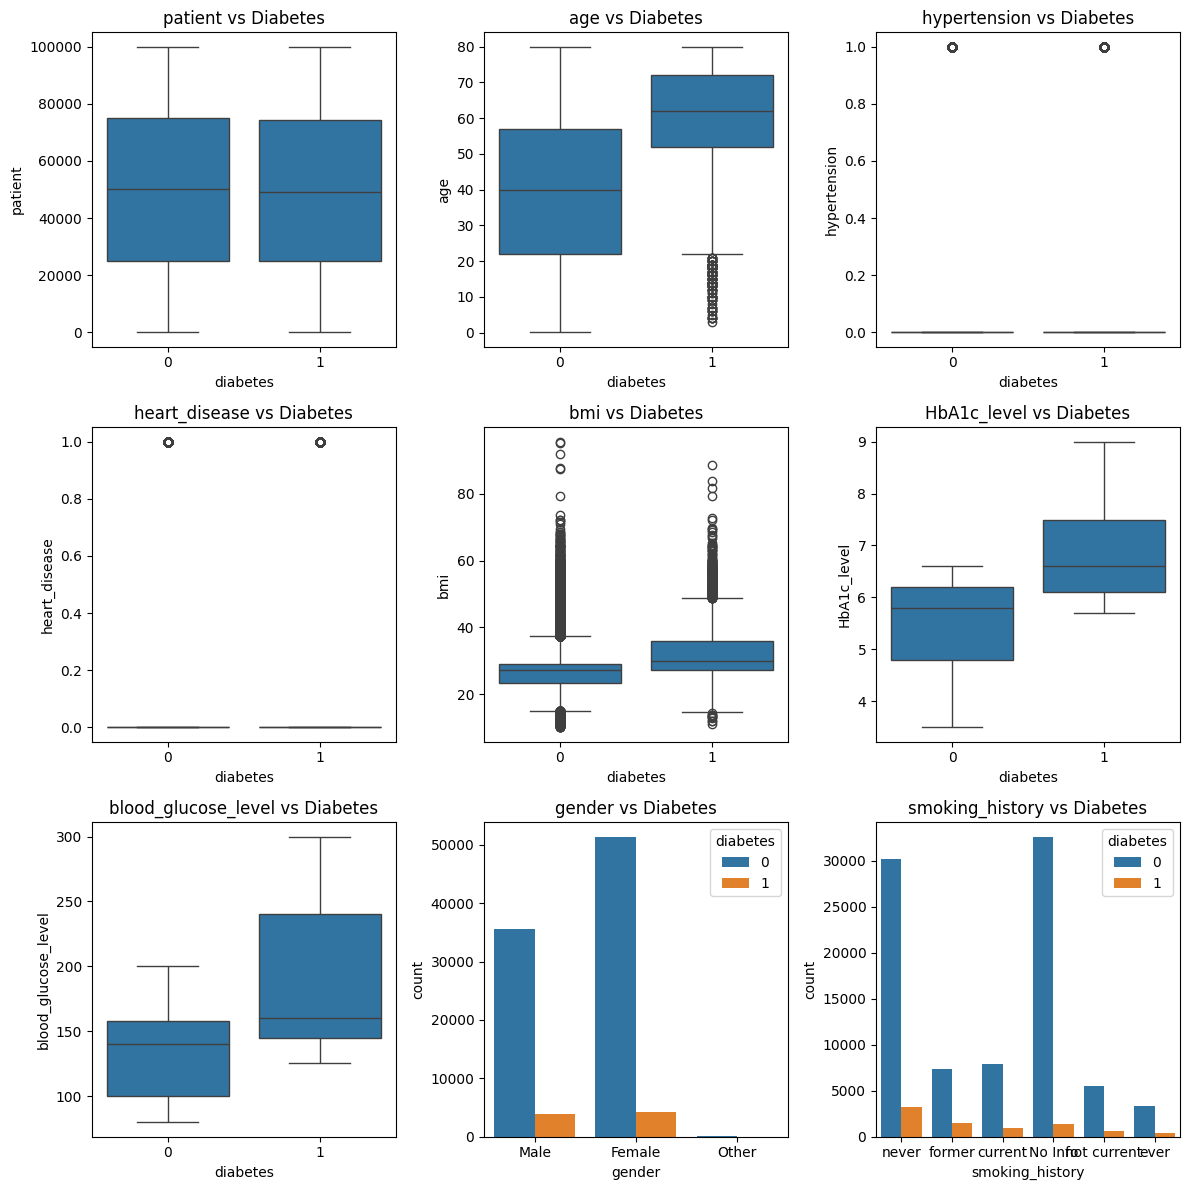

In [ ]:
# Separar las variables numéricas y categóricas
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.drop('diabetes')
categorical_cols = train_df.select_dtypes(include=['object', 'category', 'bool']).columns
# Número total de gráficos
total_graphs = len(numeric_cols) + len(categorical_cols)
# Limitar a 9 gráficos en la matriz 3x3
total_graphs = min(total_graphs, 9)
# Crear la figura con una matriz de 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.flatten()  # Convertir el arreglo de ejes en una lista plana
# Graficar variables numéricas
for i, col in enumerate(numeric_cols):
    sb.boxplot(x='diabetes', y=col, data=train_df, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes')
# Graficar variables categóricas
for j, col in enumerate(categorical_cols):
    if len(numeric_cols) + j < 9:  # Asegurarse de no exceder la cantidad de subgráficas
        sb.countplot(x=col, hue='diabetes', data=train_df, ax=axes[len(numeric_cols) + j])
        axes[len(numeric_cols) + j].set_title(f'{col} vs Diabetes')
# Eliminar los ejes no utilizados si hay menos de 9 gráficos
for k in range(total_graphs, 9):
    fig.delaxes(axes[k])
# Ajustar el diseño para una mejor visualización
plt.tight_layout()
plt.show()

El análisis de los gráficos de boxplot sugiere una tendencia en la que los pacientes con valores más elevados en las variables age, bmi, HbA1c_level y blood_glucose_level presentan una mayor propensión a desarrollar diabetes. Además, los datos de la muestra indican que la prevalencia de diabetes es relativamente mayor en proporción en hombres en comparación con mujeres.




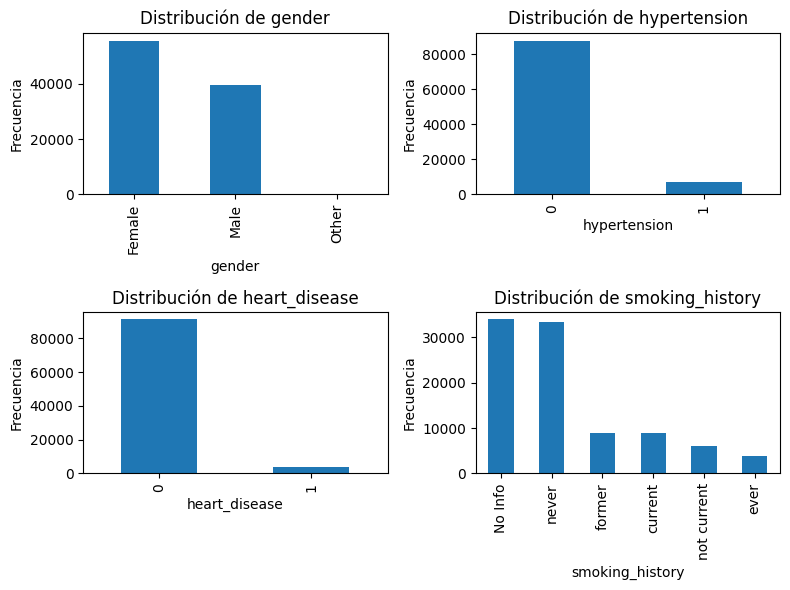

In [ ]:
# Generamos graficos de barras para las variables object e int64 excepto para 'patient' y 'diabetes'
# Seleccionar columnas categóricas (object) e int64, excluyendo 'patient' y 'diabetes'
categorical_cols = train_df.select_dtypes(include=['object', 'int64']).columns
categorical_cols = [col for col in categorical_cols if col not in ['patient', 'diabetes']]

# Crear una matriz de 2x2 para los gráficos de barras
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
axes = axes.flatten()

# Iterar sobre las columnas categóricas y crear gráficos de barras
for i, col in enumerate(categorical_cols):
    train_df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()


*   **Variable Age**

In [ ]:
#Evaluemos la variable age obteniendo la media, la mediana, el quantil 1,2, 5, 7, 10, 90, 92, 95,97 y 99 de la variable age
# Calcular la media
media_age = train_df['age'].mean()
print("Media de 'age':", media_age)
# Calcular la mediana
mediana_age = train_df['age'].median()
print("Mediana de 'age':", mediana_age)
# Calcular los cuantiles
quantiles = [0.01, 0.02, 0.05, 0.07, 0.1, 0.90,0.92,0.95, 0.97, 0.99]
quantiles_age = train_df['age'].quantile(quantiles)
print("Cuantiles de 'age':")
for q, value in zip(quantiles, quantiles_age):
    print(f"  {int(q*100)}%: {value}")

Media de 'age': 41.935268631578936
Mediana de 'age': 43.0
Cuantiles de 'age':
  1%: 1.08
  2%: 1.8
  5%: 4.0
  7%: 6.0
  10%: 10.0
  90%: 73.0
  92%: 76.0
  95%: 80.0
  97%: 80.0
  99%: 80.0


A partir del análisis del histograma, los boxplots para la variable Age y el boxplot que relaciona Age con la variable Diabetes, hemos decidido filtrar los casos para mantener aquellos cuyas edades se encuentren entre el percentil 2 y el percentil 97. Este rango se ha seleccionado para reducir el impacto de los valores atípicos y concentrarse en la mayoría de los datos representativos, con el fin de mejorar la precisión y la robustez del análisis subsiguiente.

In [ ]:
#Eliminar las filas del data set de manera tal que nos quedemos con la los valores de la variable age que sean mayores al cuantil 2 y menores que el cuantil 95.
# Calcular los cuantiles 1% y 95%
quantile_2 = train_df['age'].quantile(0.02)
quantile_97 = train_df['age'].quantile(0.97)

# Filtrar el DataFrame para mantener solo las filas dentro del rango
train_df_filt = train_df[(train_df['age'] > quantile_2) & (train_df['age'] < quantile_97)]

# Calcular el porcentaje de casos eliminados
porcentaje_eliminado = 100 * (1 - len(train_df_filt) / len(train_df))
print(f"Porcentaje de casos eliminados: {porcentaje_eliminado:.2f}%")

Porcentaje de casos eliminados: 7.64%


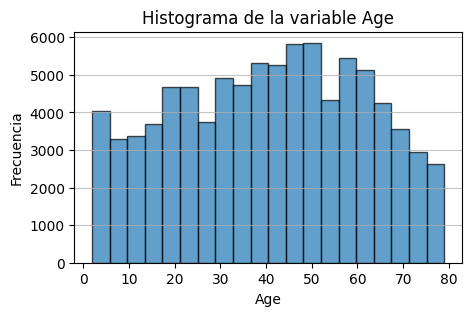

In [ ]:
#Visualicemos la variable Age luego del filtrado
#Crear el histograma de la variable 'age'
plt.figure(figsize=(5, 3))
plt.hist(train_df_filt['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histograma de la variable Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

*   **Variable bmi**

In [ ]:
#Evaluemos la variable bmi obteniendo la media y el quantil 1, 5, 7, 10, 50, 90, 92, 95, 99 y 99.9
# Calcular la media
media_bmi = train_df_filt['bmi'].mean()
print("Media de 'bmi':", media_bmi)
# Calcular la mediana
mediana_bmi = train_df_filt['bmi'].median()
print("Mediana de 'bmi':", mediana_bmi)
# Calcular los cuantiles
quantiles = [0.01, 0.05, 0.07, 0.1, 0.90,0.92,0.95, 0.99, 0.999]
quantiles_bmi= train_df_filt['bmi'].quantile(quantiles)
print("Cuantiles de 'bmi':")
for q, value in zip(quantiles, quantiles_bmi):
    print(f"  {int(q*100)}%: {value:.3f}")

Media de 'bmi': 27.559926942408733
Mediana de 'bmi': 27.32
Cuantiles de 'bmi':
  1%: 14.860
  5%: 17.180
  7%: 18.210
  10%: 19.600
  90%: 35.820
  92%: 37.160
  95%: 39.880
  99%: 49.076
  99%: 61.058


A partir del análisis del histograma, los boxplots para la variable bmi y el boxplot que relaciona bmi con la variable Diabetes, hemos decidido filtrar los casos para mantener aquellos cuyos bmi se encuentren entre el percentil 1 y el percentil 99,9%. Este rango se ha seleccionado para reducir el impacto de los valores atípicos y concentrarse en la mayoría de los datos representativos, con el fin de mejorar la precisión y la robustez del análisis subsiguiente.

In [ ]:
#Eliminar las filas del data set de manera tal que nos quedemos con la los valores de la variable bmi que sean mayores al cuantil 1 y menores que el cuantil 99,9 .
# Calcular los cuantiles 1% y 95%
quantile_1 = train_df_filt['bmi'].quantile(0.01)
quantile_999 = train_df_filt['bmi'].quantile(0.999)
# Filtrar el DataFrame para mantener solo las filas dentro del rango
train_df_filt2 = (train_df_filt[((train_df_filt['bmi'] > quantile_1) & (train_df_filt['bmi'] <= quantile_999) )])
# Calcular el porcentaje de casos eliminados
porcentaje_eliminado = (100 * (len(train_df_filt) - len(train_df_filt2))) / len((train_df_filt))
print(f"Porcentaje de casos eliminados: {porcentaje_eliminado:.2f}%")

Porcentaje de casos eliminados: 1.10%


In [ ]:
train_df_filt = train_df_filt2.copy()



*   **Gender**


In [ ]:
# Contar el número de casos 'Other' en la columna 'gender'
num_other = (train_df_filt['gender'] == 'Other').sum()

print(f"El número de casos 'Other' en la columna 'gender' es: {num_other}")

# Calcular el porcentaje de 'Other' en la columna 'gender'
porcentaje_other = (train_df_filt['gender'] == 'Other').sum() / len(train_df_filt) * 100

print(f"El porcentaje de datos en la categoría 'Other' de la variable 'gender' es: {porcentaje_other:.2f}%")


El número de casos 'Other' en la columna 'gender' es: 15
El porcentaje de datos en la categoría 'Other' de la variable 'gender' es: 0.02%


Dado que la variable Gender contiene valores faltantes o NaN, los cuales representan únicamente el 0.02% del total de los datos, hemos optado por eliminar estos registros de la base de datos. Esta decisión se basa en la mínima proporción de datos faltantes, lo que minimiza su impacto en el análisis. De este modo, aseguramos que los análisis predictivos futuros se realicen con un conjunto de datos completo y consistente, sin comprometer la integridad del modelo.

In [ ]:
# Filtrar el DataFrame para eliminar las filas con 'Other' en la columna 'gender'
train_df_filt = train_df_filt[train_df_filt['gender'] != 'Other']
# Verificar la cantidad de filas restantes
print(train_df_filt.shape)

(86756, 10)



*   **Smoking_history**


In [ ]:
# Calcular el porcentaje de No Info' de la variable 'smoking_history'
porcentaje_NoInfo = (train_df_filt['smoking_history'] == 'No Info').sum() / len(train_df_filt) * 100
print(f"El porcentaje de datos en la categoría 'No Info' de la variable 'smoking_history' es: {porcentaje_NoInfo:.2f}%")

# Contar el número de casos 'Other' en la columna 'gender'
num_other = (train_df_filt['smoking_history'] == 'No Info').sum()

print(f"El número de casos 'Other' en la columna 'gender' es: {num_other}")

El porcentaje de datos en la categoría 'No Info' de la variable 'smoking_history' es: 34.29%
El número de casos 'Other' en la columna 'gender' es: 29749


In [ ]:
# Calculamos la moda de la variable 'smoking_history'
moda_smoking = train_df_filt['smoking_history'].mode()[0]
print("La moda de 'smoking_history' es:", moda_smoking)

La moda de 'smoking_history' es: never


In [ ]:
# Evalemos si hay una asociación significativa entre las dos variables categóricas Diabetes y smoking_history.
# Crear la tabla de contingencia
contingency_table = pd.crosstab( train_df_filt['diabetes'], train_df_filt['smoking_history'], margins=True, margins_name="Total")

# Mostrar la tabla de contingencia
print('Tabla de contingencia:')
print(contingency_table)


# Realizar la prueba de chi-cuadrado
from scipy.stats import chi2_contingency # Import the chi2_contingency function
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print()
# Mostrar los resultados de la prueba de chi-cuadrado
print(f'Estadístico de chi-cuadrado: {chi2_stat:.4f}')
print(f'Valor p: {p_value:.4f}')
print(f'Grados de libertad: {dof}')
print('Tabla de frecuencias esperadas:')
print(expected)

Tabla de contingencia:
smoking_history  No Info  current  ever  former  never  not current  Total
diabetes                                                                  
0                  28556     7796  3194    6658  28444         5042  79690
1                   1193      872   408    1311   2712          570   7066
Total              29749     8668  3602    7969  31156         5612  86756

Estadístico de chi-cuadrado: 1549.3799
Valor p: 0.0000
Grados de libertad: 12
Tabla de frecuencias esperadas:
[[27326.03866015  7962.0189958   3308.62856748  7319.95032044
  28618.44298953  5154.9204666  79690.        ]
 [ 2422.96133985   705.9810042    293.37143252   649.04967956
   2537.55701047   457.0795334   7066.        ]
 [29749.          8668.          3602.          7969.
  31156.          5612.         86756.        ]]


En relación con la variable smoking_history, observamos que el 34.74% de los datos están clasificados como "No info". Para manejar esta situación, reemplazaremos la categoría "No info" mediante una imputación ponderada. Esto implica sustituir los valores faltantes de manera que se respeten las proporciones originales de las categorías en el conjunto de datos. Este enfoque permite mantener la distribución inherente de la variable y conservar la integridad de la información para el análisis predictivo.

In [ ]:
#Reemplazamos  la categoría  "No info"  en la variable 'smoking_history' de manera ponderada, es decir que se respetan las proporciones que originalmente hay en el data set
# Calcular las proporciones de cada categoría (excluyendo 'No Info')
proporciones = train_df_filt[train_df_filt['smoking_history'] != 'No Info']['smoking_history'].value_counts(normalize=True)

# Reemplazar 'No Info' de manera ponderada
for index, row in train_df_filt.iterrows():
    if row['smoking_history'] == 'No Info':
        # Elegir una categoría al azar según las proporciones calculadas
        nueva_categoria = np.random.choice(proporciones.index, p=proporciones.values)
        # Fix the indentation here
        train_df_filt.at[index, 'smoking_history'] = nueva_categoria

# Verificar los cambios
print(train_df_filt['smoking_history'].value_counts())
print(train_df_filt['smoking_history'].unique())

smoking_history
never          47550
current        13083
former         12040
not current     8525
ever            5558
Name: count, dtype: int64
['never' 'former' 'current' 'not current' 'ever']


A continuación, procedemos a la codificación de las variables categóricas 'gender' y 'smoking_history'. Esta transformación convierte las categorías en variables numéricas, permitiendo su inclusión en los modelos predictivos. Posteriormente, estandarizaremos las variables 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level' para asegurar que todas las características del modelo tengan una escala comparable.

In [ ]:
# Codificar las variables categóricas utilizando One-Hot Encoding
train_df_encoded = pd.get_dummies(train_df_filt, columns=['gender', 'smoking_history'], dtype=float)
# Transformar valores True y False en 1 y 0
#train_df_encoded = train_df_encoded.astype(int)
print("\nDataFrame después de One-Hot Encoding y transformación de True/False a 1/0:")
print(train_df_encoded)
print(list(train_df_encoded.columns))


DataFrame después de One-Hot Encoding y transformación de True/False a 1/0:
       patient   age  hypertension  heart_disease    bmi  HbA1c_level  \
0        20432   4.0             0              0  19.28          3.5   
1        49682  50.0             0              0  27.32          5.7   
2        73886  43.0             0              0  21.54          4.5   
3        53144  64.0             0              0  28.22          6.0   
4        98507  10.0             0              0  15.46          6.1   
...        ...   ...           ...            ...    ...          ...   
94995    81090  56.0             0              0  22.30          6.2   
94996    90924  24.0             0              0  22.50          6.1   
94997    64600  32.0             0              0  24.92          6.6   
94998    96132  21.0             0              0  20.59          4.5   
94999    47868  53.0             0              0  27.32          6.2   

       blood_glucose_level  diabetes  gender_F

In [ ]:
# Definimos las variables a estandsarizar
columnas_std= ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [ ]:
# Verifica que todas las columnas existan en el DataFrame
missing_columns = [col for col in columnas_std if col not in train_df_encoded.columns]
if missing_columns:
    print(f"Las siguientes columnas no se encuentran en el DataFrame: {missing_columns}")
else:
    # Crear un DataFrame de copia para estandarizar
    train_df_std = train_df_encoded.copy()

    # Crear un objeto StandardScaler
    scaler = StandardScaler()

    # Ajustar el scaler a los datos y transformar las columnas seleccionadas
    train_df_std[columnas_std] = scaler.fit_transform(train_df_encoded[columnas_std])

    # Mostrar el DataFrame después de la estandarización
    print("\nDataFrame después de estandarizar:")
    print(train_df_std.head())



DataFrame después de estandarizar:
   patient       age  hypertension  heart_disease       bmi  HbA1c_level  \
0    20432 -1.808736             0              0 -1.307539    -1.898261   
1    49682  0.450054             0              0 -0.052529     0.166069   
2    73886  0.106325             0              0 -0.954763    -0.959929   
3    53144  1.137512             0              0  0.087957     0.447569   
4    98507 -1.514111             0              0 -1.903825     0.541402   

   blood_glucose_level  diabetes  gender_Female  gender_Male  \
0             0.423894         0            0.0          1.0   
1             0.522747         0            1.0          0.0   
2             0.176760         0            1.0          0.0   
3            -0.193940         0            0.0          1.0   
4             0.053193         0            0.0          1.0   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                      0.0                   0

In [ ]:
train_df_std

,patient,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,20432,-1.808736,0,0,-1.307539,-1.898261,0.423894,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,49682,0.450054,0,0,-0.052529,0.166069,0.522747,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,73886,0.106325,0,0,-0.954763,-0.959929,0.176760,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53144,1.137512,0,0,0.087957,0.447569,-0.193940,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,98507,-1.514111,0,0,-1.903825,0.541402,0.053193,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,81090,0.744679,0,0,-0.836130,0.635235,0.498034,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
94996,90924,-0.826653,0,0,-0.804911,0.541402,-0.292794,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
94997,64600,-0.433820,0,0,-0.427159,1.010568,0.176760,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
94998,96132,-0.973966,0,0,-1.103054,-0.959929,0.423894,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_df_final=train_df_std.copy()

Dividimos el DataFrame en conjuntos de entrenamiento y prueba (75/25)

In [ ]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba (75/25)
train_df_train, test_df_test = train_test_split(train_df_final, test_size=0.25, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
print(f"Tamaño del conjunto de entrenamiento: {train_df_train.shape}")
print(f"Tamaño del conjunto de prueba: {test_df_test.shape}")


Tamaño del conjunto de entrenamiento: (65067, 15)
Tamaño del conjunto de prueba: (21689, 15)


In [ ]:
list(train_df_train.columns)

['patient',
 'age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes',
 'gender_Female',
 'gender_Male',
 'smoking_history_current',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current']

# **Evaluemos modelos**
'Árbol de decisión',
         'Random Forest',
         'Regresión Logística',
         'Perceptrón multicapa',
         'XGBoost',
         'Naive Bayes',
         'SVM',
         'K-Nearest Neighbors',
         'AdaBoost',
         'Gradient Boosting',
         'HistGradientBoosting',
         'CatBoost',
         'LightGBM',
         'Extra Trees',
         'Quadratic Discriminant Analysis',
         'Ridge Classifier',
         'Nearest Centroid'

In [ ]:
!pip install xgboost

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Suponiendo que train_df_train y test_df_test ya están definidos
# Seleccionar características y la variable objetivo para el conjunto de entrenamiento
X_train = train_df_train[['patient', 'age', 'hypertension', 'heart_disease',
                            'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Female',
                            'gender_Male', 'smoking_history_current', 'smoking_history_ever',
                            'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']].values  # Características

y_train = train_df_train['diabetes'].values  # Variable objetivo

# Seleccionar características y la variable objetivo para el conjunto de prueba
X_test = test_df_test[['patient', 'age', 'hypertension', 'heart_disease',
                            'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Female',
                            'gender_Male', 'smoking_history_current', 'smoking_history_ever',
                            'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']].values  # Características
y_test = test_df_test['diabetes'].values  # Variable objetivo

# Definir los clasificadores y sus nombres
clfs = [DecisionTreeClassifier(random_state=8),
        RandomForestClassifier(random_state=8),
        LogisticRegression(random_state=8, max_iter=500),
        MLPClassifier(random_state=8, max_iter=1000),
        XGBClassifier(random_state=8),
        GaussianNB(),
        LinearSVC(random_state=8, max_iter=10000),
        KNeighborsClassifier(),
        AdaBoostClassifier(random_state=8),
        GradientBoostingClassifier(random_state=8),
        HistGradientBoostingClassifier(),
        SGDClassifier(random_state=8),
        SVC(random_state=8),
        ExtraTreesClassifier(random_state=8),
        QuadraticDiscriminantAnalysis(),
        RidgeClassifier(),
        NearestCentroid()]

names = ['Árbol de decisión',
         'Random Forest',
         'Regresión Logística',
         'Perceptrón multicapa',
         'XGBoost',
         'Naive Bayes',
         'SVM Lineal',
         'K-Nearest Neighbors',
         'AdaBoost',
         'Gradient Boosting',
         'HistGradientBoosting',
         'SGD Classifier',
         'SVM RBF',
         'Extra Trees',
         'Quadratic Discriminant Analysis',
         'Ridge Classifier',
         'Nearest Centroid']

# Inicializar listas para almacenar los modelos entrenados y sus precisiones
trained_models = []
accuracy_models = []

# Entrenar y evaluar cada modelo
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(X_train, y_train)

    # Evaluar en el conjunto de entrenamiento
    train_predictions = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: {train_accuracy:.4f}")

    # Evaluar en el conjunto de prueba
    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: {test_accuracy:.4f}")

    # Almacenar el modelo entrenado y su precisión
    trained_models.append(clf)
    accuracy_models.append(test_accuracy * 100)


Árbol de decisión
Accuracy train Árbol de decisión: 1.0000
Accuracy test Árbol de decisión: 0.9502
Random Forest
Accuracy train Random Forest: 1.0000
Accuracy test Random Forest: 0.9717
Regresión Logística
Accuracy train Regresión Logística: 0.9627
Accuracy test Regresión Logística: 0.9597
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 0.9385
Accuracy test Perceptrón multicapa: 0.9345
XGBoost
Accuracy train XGBoost: 0.9789
Accuracy test XGBoost: 0.9712
Naive Bayes
Accuracy train Naive Bayes: 0.9466
Accuracy test Naive Bayes: 0.9444
SVM Lineal
Accuracy train SVM Lineal: 0.9337
Accuracy test SVM Lineal: 0.9310
K-Nearest Neighbors
Accuracy train K-Nearest Neighbors: 0.9221
Accuracy test K-Nearest Neighbors: 0.9163
AdaBoost
Accuracy train AdaBoost: 0.9730
Accuracy test AdaBoost: 0.9723
Gradient Boosting
Accuracy train Gradient Boosting: 0.9735
Accuracy test Gradient Boosting: 0.9723
HistGradientBoosting
Accuracy train HistGradientBoosting: 0.9745
Accuracy test HistGradientBoosti

In [ ]:
# Lista de los modelos en orden de mejor Accuracy test
# Crear un DataFrame con los nombres de los modelos y sus precisiones
model_df = pd.DataFrame({'Modelo': names, 'Accuracy': accuracy_models})
# Ordenar el DataFrame por precisión descendente
model_df_sorted = model_df.sort_values('Accuracy', ascending=False)
# Imprimir la lista de modelos ordenados
print(model_df_sorted)

                             Modelo   Accuracy
8                          AdaBoost  97.233621
9                 Gradient Boosting  97.233621
10             HistGradientBoosting  97.187514
1                     Random Forest  97.169072
4                           XGBoost  97.122966
13                      Extra Trees  96.929319
2               Regresión Logística  95.970308
0                 Árbol de decisión  95.015907
5                       Naive Bayes  94.439578
15                 Ridge Classifier  93.946240
3              Perceptrón multicapa  93.452902
6                        SVM Lineal  93.102494
12                          SVM RBF  91.737747
7               K-Nearest Neighbors  91.627092
14  Quadratic Discriminant Analysis  90.317673
16                 Nearest Centroid  50.269722
11                   SGD Classifier   8.280695


# **Optimizacion hiperparámetros Gradient Boosting**

Gradient Boosting, también conocido como Gradient Boosting Machine (GBM), es un algoritmo de ensamble que se utiliza tanto para tareas de clasificación como de regresión. Al igual que AdaBoost, se basa en la combinación de múltiples modelos débiles para construir un modelo robusto, pero utiliza un enfoque diferente para combinar estos modelos.

Principio de Funcionamiento:

Inicialización: Comienza con un modelo base sencillo, como la predicción de la media en problemas de regresión.

Cálculo del Error Residual: Tras entrenar el primer modelo, se calcula el error residual, que es la diferencia entre las predicciones del modelo y los valores reales.

Entrenamiento sobre el Error Residual: En cada iteración subsiguiente, se entrena un nuevo modelo para predecir estos errores residuales. Este modelo intenta corregir las deficiencias del conjunto de modelos anteriores.

Combinación de Modelos: Los modelos se combinan aditivamente. La predicción final se obtiene sumando las predicciones ponderadas de todos los modelos, ajustadas por un parámetro de aprendizaje (learning rate) para controlar la contribución de cada modelo y evitar el sobreajuste.

Optimización del Error: Utiliza técnicas de optimización numérica, como el descenso de gradiente, para minimizar una función de pérdida (por ejemplo, error cuadrático medio para regresión o entropía cruzada para clasificación).

Ventajas de Gradient Boosting:

Alta Precisión: Suele ofrecer alta precisión y es muy valorado en competiciones de ciencia de datos.
Flexibilidad: Admite diferentes funciones de pérdida y se adapta a una amplia variedad de problemas.
Control sobre el Ajuste: Permite un ajuste detallado mediante parámetros como la tasa de aprendizaje, la profundidad de los árboles y el número de estimadores.
Desventajas de Gradient Boosting:
Costoso en Cómputo: Puede ser lento de entrenar, especialmente con grandes conjuntos de datos.
Complejidad: Requiere ajuste meticuloso de hiperparámetros para evitar sobreajuste y asegurar un rendimiento óptimo.
Sensibilidad al Ruido: Puede ser sensible al ruido en los datos de entrenamiento.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Crear una instancia del clasificador GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=8)

# Definir la grilla de hiperparámetros a explorar
param_distributions = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]  # Añadir subsample para optimización
}

# Realizar búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(gb_clf, param_distributions, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=8)
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtener el mejor modelo
best_gb_clf = random_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred = best_gb_clf.predict(X_test)

# Calcular métricas en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas en el conjunto de prueba
print("\n--- Métricas en el conjunto de prueba con Gradient Boosting ---")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Mejores hiperparámetros: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 0.1}

--- Métricas en el conjunto de prueba con Gradient Boosting ---
Accuracy: 0.974784551548037
Precision: 0.9792332268370607
Recall: 0.6993725042783799
F1 Score: 0.8159733777038269


#  **Optimizacion hiperparámetros RandomForest**

Random Forest es un algoritmo de aprendizaje automático basado en ensamblaje que se utiliza tanto para tareas de clasificación como de regresión.
Principio de Funcionamiento:

Creación de Múltiples Árboles de Decisión:

*Generación de Muestras Aleatorias*: Random Forest construye múltiples árboles de decisión utilizando diferentes subconjuntos aleatorios del conjunto de datos de entrenamiento. Cada árbol se entrena con una muestra bootstrap (muestra con reemplazo) del conjunto de datos original, lo que introduce variabilidad entre los árboles.
*Selección Aleatoria de Características*: Para cada nodo en cada árbol, se selecciona aleatoriamente un subconjunto de características para determinar la mejor división. Esto asegura que los árboles sean menos correlacionados entre sí, promoviendo la diversidad en el bosque.

Predicción Através del Bosque:

*Predicción de Cada Árbol*: Cada árbol en el bosque realiza una predicción por separado para una instancia de entrada.
*Promedio:* Para tareas de clasificación, las predicciones de los árboles se combinan mediante un voto mayoritario, donde la clase más frecuente entre los árboles es la predicción final. Para tareas de regresión, se calcula el promedio de las predicciones de todos los árboles.

Promedio de Resultados:

Clasificación: La clase que recibe la mayoría de los votos de los árboles es la clase final predicha para una instancia.
Regresión: Se promedia la salida de todos los árboles para obtener la predicción final.


Ventajas de Random Forest:
Robustez y Precisión: La combinación de múltiples árboles de decisión reduce el riesgo de sobreajuste y mejora la precisión del modelo en comparación con un solo árbol de decisión.
Manejo de Datos Faltantes: Puede manejar datos faltantes y proporciona estimaciones de la importancia de las características.
Versatilidad: Funciona bien con datos tanto estructurados como no estructurados y no requiere una preparación de datos extensa.
Desventajas de Random Forest:
Complejidad Computacional: La construcción y evaluación de múltiples árboles puede ser computacionalmente costosa, especialmente con grandes conjuntos de datos.
Menos Interpretabilidad: Aunque los modelos individuales de árboles de decisión son interpretables, un modelo de Random Forest, con su conjunto de árboles, es más difícil de interpretar en su conjunto.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint
# Crear una instancia del clasificador RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=8)

# Definir la grilla de hiperparámetros a explorar
param_distributions = {
    'n_estimators': randint(10, 50),  # Número de árboles en el bosque
    'max_depth': randint(3, 10),       # Profundidad máxima de los árboles
    'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': randint(1, 20),   # Número mínimo de muestras en un nodo hoja
    'bootstrap': [True, False]          # Si usar bootstrap para la construcción de árboles
}

# Realizar búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(rf_clf, param_distributions, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=8)
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtener el mejor modelo
best_rf_clf = random_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred = best_rf_clf.predict(X_test)

# Calcular métricas en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas en el conjunto de prueba
print("\n--- Métricas en el conjunto de prueba con RandomForest ---")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 7, 'min_samples_leaf': 18, 'min_samples_split': 11, 'n_estimators': 15}

--- Métricas en el conjunto de prueba con RandomForest ---
Accuracy: 0.974875746659979
Precision: 1.0
Recall: 0.6856816885339418
F1 Score: 0.8135363790186125


#  **Optimizacion hiperparámetros AdaBoost**


AdaBoost, que significa Adaptive Boosting, es un algoritmo de ensamblaje en aprendizaje automático diseñado para mejorar la precisión de modelos débiles, como árboles de decisión de poca profundidad.

Principio de Funcionamiento:

Inicialización: Se entrena un primer clasificador débil en el conjunto de datos original, que puede ser un árbol de decisión simple u otro modelo básico con rendimiento ligeramente superior al azar.

Pesado de Ejemplares: Inicialmente, todos los ejemplos tienen el mismo peso. Después de entrenar el primer clasificador, AdaBoost ajusta los pesos de los ejemplos según si fueron correctamente clasificados o no. Los ejemplos mal clasificados obtienen más peso para las siguientes iteraciones.

Entrenamiento Iterativo: En cada iteración, se entrena un nuevo clasificador en el conjunto de datos ponderado. Este enfoque permite que los clasificadores sucesivos se concentren en ejemplos difíciles de clasificar correctamente.

Combinación de Clasificadores: Los clasificadores son ponderados según su precisión y sus predicciones se combinan mediante un voto ponderado para generar la predicción final. Los clasificadores más precisos tienen mayor influencia en la decisión final.

Ventajas de AdaBoost:

Mejora de Precisión: Aumenta significativamente la precisión de modelos débiles, generando un modelo robusto y potente.
Simplicidad: Relativamente sencillo de implementar, con pocos parámetros a ajustar.
Versatilidad: Compatible con varios tipos de clasificadores débiles.
Desventajas de AdaBoost:
Sensibilidad a Datos Ruidosos y Atípicos: Puede ser afectado por datos ruidosos y valores atípicos debido a su enfoque en ajustar los ejemplos difíciles.
Problemas de Sobreajuste: Existe riesgo de sobreajuste si el número de iteraciones es excesivo.
AdaBoost es una técnica eficaz para mejorar el rendimiento de modelos simples, pero es importante considerar sus limitaciones y ajustar los parámetros cuidadosamente para evitar problemas de sobreajuste y sensibilidad a datos ruidosos.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Definir el clasificador base y el modelo AdaBoost
base_estimator = DecisionTreeClassifier()

# Definir el modelo AdaBoost
adaboost = AdaBoostClassifier(estimator=base_estimator)

# Definir los hiperparámetros a buscar con un rango reducido
param_dist = {
    'n_estimators': randint(10, 200),  # Rango de 50 a 150 árboles
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],  # Menor cantidad de tasas de aprendizaje
    'estimator__max_depth': randint(1, 10),  # Profundidad máxima del estimador base de 1 a 3
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=adaboost, param_distributions=param_dist, n_iter=30,
                                   cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor puntuación en la validación cruzada: {best_score}")

# Evaluar el modelo en el conjunto de prueba
best_modelAda = random_search.best_estimator_
test_scoreAda = best_modelAda.score(X_test, y_test)

print(f"Puntuación en el conjunto de prueba: {test_scoreAda}")



Mejores hiperparámetros: {'estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 199}
Mejor puntuación en la validación cruzada: 0.9726562331224846
Puntuación en el conjunto de prueba: 0.974647758880124


# **Staking**

tacking (también conocido como Stacked Generalization) es un método de aprendizaje automático en el que se combinan múltiples modelos para mejorar el rendimiento predictivo. A diferencia de otros enfoques de ensamblaje como Bagging y Boosting, que combinan modelos similares de diferentes maneras, el Stacking combina diversos tipos de modelos para aprovechar las fortalezas de cada uno y reducir los errores generales. Aquí te explico cómo funciona y sus principales características:

Principio de Funcionamiento:
Entrenamiento de Modelos Base:

Modelos Diversos: Se entrenan varios modelos base, que pueden ser diferentes tipos de algoritmos de aprendizaje automático (por ejemplo, árboles de decisión, máquinas de soporte vectorial, redes neuronales, etc.). Cada modelo base se entrena en el conjunto de datos original.
Generación de Predicciones: Cada modelo base realiza predicciones para el conjunto de datos de entrenamiento.
Creación de un Conjunto de Datos de Segundo Nivel:

Predicciones como Nuevas Características: Las predicciones realizadas por los modelos base se utilizan como nuevas características en un segundo conjunto de datos, denominado conjunto de datos de segundo nivel o metadatos.
Datos de Entrenamiento del Meta-Modelo: El conjunto de datos de segundo nivel se utiliza para entrenar un meta-modelo, que es el modelo que aprenderá a combinar las predicciones de los modelos base.
Entrenamiento del Meta-Modelo:

Meta-Aprendizaje: El meta-modelo (también conocido como modelo de nivel 1 o modelo de combinación) se entrena utilizando las predicciones de los modelos base como entradas y las verdaderas etiquetas de los datos como salida. Este meta-modelo aprende a combinar las predicciones de los modelos base para mejorar la precisión general.
Predicción Final:

Aplicación del Meta-Modelo: Para hacer predicciones en nuevos datos, los modelos base generan predicciones para esos datos, y el meta-modelo combina estas predicciones para producir la predicción final.

In [ ]:
# Definir los modelos base
base_learners = [
    ('gb',  best_gb_clf),
    ('rf', best_rf_clf),
    ('ada', best_modelAda)
]

# Modelo meta
meta_model = LogisticRegression(random_state=8)

# Inicializar y entrenar el StackingClassifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
stacking_predictions = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Accuracy del Stacking Classifier: {stacking_accuracy:.4f}")


Accuracy del Stacking Classifier: 0.9730


# **Predicción con datos Test**

Cargamos los datos de test. Estos datos son los que van a utilizar para predecir si las personas tienen diabetes y generar alrchivo `submision.csv` para utilizar en la competencia de Kaggle.

Se deben realizar las mismas transformaciones que se le realizó al data set Train

In [ ]:
## Cargamos el pkl (path = Mi unidad/DIPLODATOS2023/my_df.pkl)
#my_path='/content/drive/MyDrive/DiploDatos/Colab\ Notebooks/'
my_path='/content/drive/MyDrive/DiploDatos/Colab Notebooks/'
test_df = pd.read_csv(f"{my_path}/diabetes_prediction_dataset_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DiploDatos/Colab Notebooks//diabetes_prediction_dataset_test.csv'

In [ ]:
#Ruta Mara
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AS/diabetes_prediction_dataset_test.csv')

In [ ]:
print(test_df.shape)
print(test_df.describe())

In [ ]:
test_df.head()

In [ ]:
test_df.info()

In [ ]:
#Convertir la variable blood_glucose_level a float64
test_df['blood_glucose_level'] = test_df['blood_glucose_level'].astype('float64')

In [ ]:
import missingno as msno
msno.matrix(test_df,figsize=(6, 3), fontsize=12, color=[0,0,0.2])

In [ ]:
# Calcular el porcentaje de 'Other' en la columna 'gender'
porcentaje_other_test = (test_df['gender'] == 'Other').sum() / len(train_df) * 100

print(f"El porcentaje de datos en la categoría 'Other' de la variable 'gender' es: {porcentaje_other_test:.5f}%")


El porcentaje de datos en la categoría 'Other' de la variable 'gender' es: 0.00211%


In [ ]:
# Calcular el número de casos 'Other' en la variable 'gender'
num_other_gender = (test_df['gender'] == 'Other').sum()

print(f"El número de casos 'Other' en la variable 'gender' es: {num_other_gender}")


El número de casos 'Other' en la variable 'gender' es: 2


In [ ]:
# Calcular el número de casos 'Male' en la variable 'gender'
num_male_gender = (test_df['gender'] == 'Male').sum()

# Calcular el número de casos 'Female' en la variable 'gender'
num_female_gender = (test_df['gender'] == 'Female').sum()

# Calcular la proporción de 'Male'
proporcion_male = num_male_gender / (num_male_gender + num_female_gender)

# Calcular la proporción de 'Female'
proporcion_female = num_female_gender / (num_male_gender + num_female_gender)

print(f"La proporción de 'Male' en la variable 'gender' es: {proporcion_male:.2f}")
print(f"La proporción de 'Female' en la variable 'gender' es: {proporcion_female:.2f}")


La proporción de 'Male' en la variable 'gender' es: 0.40
La proporción de 'Female' en la variable 'gender' es: 0.60


In [ ]:
# Reemplazar 'Other' por 'Female' en la columna 'gender'
#test_df['gender'] = test_df['gender'].replace('Other', 'Female')

# Verificar que los cambios se hayan aplicado
#print(test_df['gender'].unique())


['Male' 'Female']


In [ ]:
# Eliminar filas con 'Other' en la columna 'gender'
#test_df = test_df[test_df['gender'] != 'Other']
# Verificar la cantidad de filas restantes
#print(test_df.shape)

(5000, 10)


In [ ]:
# Calcular el porcentaje de 'No_Info' de la columna 'smoking_history'
porcentaje_NoInfo_test = (test_df['smoking_history'] == 'No_Info').sum() / len(test_df) * 100

print(f"El porcentaje de datos en la categoría 'No_Info' de la variable 'smoking_history' es: {porcentaje_NoInfo_test :.7f}%")

El porcentaje de datos en la categoría 'No_Info' de la variable 'smoking_history' es: 0.0000000%


In [ ]:
# Calcular el número de casos 'No_Info en la variable 'smoking_history'
No_Info_smoking_history = (test_df['smoking_history'] == 'No_Info').sum()

print(f"El número de casos 'No_Info' en la variable 'smoking_history' es: {No_Info_smoking_history}")

El número de casos 'No_Info' en la variable 'smoking_history' es: 0


In [ ]:
# Aplicamos One-Hot Encoding a 'gender' y 'smoking_history'
test_df_encoded = pd.get_dummies(test_df, columns=['gender', 'smoking_history'], dtype=float)
# Reemplaza True por 1 y False por 0 en las columnas codificadas
#test_df_encoded = test_df_encoded.replace({True: 1, False: 0})
# Verifica el resultado
print(test_df_encoded.head())


   patient   age  hypertension  heart_disease    bmi  HbA1c_level  \
0    49267  53.0             0              0  31.99          4.5   
1    82280  22.0             0              0  25.96          6.6   
2    33216  37.0             0              0  22.24          6.2   
3    94551  29.0             0              0  31.01          5.0   
4    43760  30.0             0              0  28.66          6.6   

   blood_glucose_level  diabetes  gender_Female  gender_Male  gender_Other  \
0                126.0       NaN            0.0          1.0           0.0   
1                130.0       NaN            1.0          0.0           0.0   
2                126.0       NaN            1.0          0.0           0.0   
3                 80.0       NaN            1.0          0.0           0.0   
4                100.0       NaN            0.0          1.0           0.0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                      0.0             

In [ ]:
# Eliminar las columnas 'smoking_history_No_Info', 'gender_Other' y 'diabetes'
test_df_encoded = test_df_encoded.drop(['smoking_history_No Info', 'gender_Other', 'diabetes'], axis=1)
# Verificar el resultado
print(test_df_encoded.head())

   patient   age  hypertension  heart_disease    bmi  HbA1c_level  \
0    49267  53.0             0              0  31.99          4.5   
1    82280  22.0             0              0  25.96          6.6   
2    33216  37.0             0              0  22.24          6.2   
3    94551  29.0             0              0  31.01          5.0   
4    43760  30.0             0              0  28.66          6.6   

   blood_glucose_level  gender_Female  gender_Male  smoking_history_current  \
0                126.0            0.0          1.0                      0.0   
1                130.0            1.0          0.0                      0.0   
2                126.0            1.0          0.0                      0.0   
3                 80.0            1.0          0.0                      0.0   
4                100.0            0.0          1.0                      0.0   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                   0.0             

In [ ]:
list(test_df_encoded.columns)

['patient',
 'age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'gender_Female',
 'gender_Male',
 'smoking_history_current',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current']

In [ ]:
# Verifica que todas las columnas existan en el DataFrame
missing_columns = [col for col in columnas_std if col not in test_df_encoded.columns]
if missing_columns:
    print(f"Las siguientes columnas no se encuentran en el DataFrame: {missing_columns}")
else:
    # Crear un DataFrame de copia para estandarizar
    test_df_std = test_df_encoded.copy()

    # Crear un objeto StandardScaler
    scaler = StandardScaler()

    # Ajustar el scaler a los datos y transformar las columnas seleccionadas
    test_df_std[columnas_std] = scaler.fit_transform(test_df_encoded[columnas_std])

    # Mostrar el DataFrame después de la estandarización
    print("\nDataFrame después de estandarizar:")
    print(test_df_std.head(3))


DataFrame después de estandarizar:
   patient       age  hypertension  heart_disease       bmi  HbA1c_level  \
0    49267  0.534851             0              0  0.683720    -0.950085   
1    82280 -0.840774             0              0 -0.198857     0.997153   
2    33216 -0.175149             0              0 -0.743333     0.626250   

   blood_glucose_level  gender_Female  gender_Male  smoking_history_current  \
0            -0.294803            0.0          1.0                      0.0   
1            -0.195048            1.0          0.0                      0.0   
2            -0.294803            1.0          0.0                      0.0   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                   0.0                     0.0                    1.0   
1                   0.0                     0.0                    1.0   
2                   0.0                     0.0                    1.0   

   smoking_history_not current  
0           

Aplicamnos los modelos a Test:

In [ ]:
from google.colab import files
#GBoost
# Seleccionar las características del conjunto de datos de prueba
X_test_std = test_df_std[['patient', 'age', 'hypertension', 'heart_disease',
                            'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Female',
                            'gender_Male', 'smoking_history_current', 'smoking_history_ever',
                            'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']].values

# Realizar predicciones en el conjunto de prueba con el mejor modelo Gradient Boosting
y_pred_test_gb = best_gb_clf.predict(X_test_std)

# Crear un DataFrame solo con las predicciones
predictions_gb_df = pd.DataFrame({
    'patient': test_df_std['patient'],
    'diabetes': y_pred_test_gb
})

# Guardar las predicciones en un archivo CSV
predictions_gb_df.to_csv('submission_GB.csv', index=False)

# Descargar el archivo de predicciones
files.download('submission_GB.csv')

print("Archivo 'submission_GB.csv' creado con las predicciones.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo 'submission_GB.csv' creado con las predicciones.


In [ ]:
# RForest
# Seleccionar las características del conjunto de datos de prueba
X_test_std = test_df_std[['patient', 'age', 'hypertension', 'heart_disease',
                            'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Female',
                            'gender_Male', 'smoking_history_current', 'smoking_history_ever',
                            'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']].values

# Realizar predicciones en el conjunto de prueba con el mejor modelo RandomForest
y_pred_test_rf = best_rf_clf.predict(X_test_std)

# Crear un DataFrame solo con las predicciones
predictions_rf_df = pd.DataFrame({
    'patient': test_df_std['patient'],
    'diabetes': y_pred_test_rf
})

# Guardar las predicciones en un archivo CSV
predictions_rf_df.to_csv('submission_RF.csv', index=False)

# Descargar el archivo de predicciones
files.download('submission_RF.csv')

print("Archivo 'submission_RF.csv' creado con las predicciones.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo 'submission_RF.csv' creado con las predicciones.


In [ ]:
#ABoost
# Seleccionar las características del conjunto de datos de prueba
X_test_std = test_df_std[['patient', 'age', 'hypertension', 'heart_disease',
                            'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Female',
                            'gender_Male', 'smoking_history_current', 'smoking_history_ever',
                            'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']].values

# Realizar predicciones en el conjunto de prueba
y_pred_testAda = best_modelAda.predict(X_test_std)

# Crear un DataFrame solo con las predicciones
predictions_Ada_df = pd.DataFrame({
    'patient': test_df_std['patient'],
    'diabetes': y_pred_testAda
})

# Guardar las predicciones en un archivo CSV
predictions_Ada_df.to_csv('submission_Ada.csv', index=False)

# Descargar el archivo de predicciones de la regresión logística
files.download('submission_Ada.csv')

print("Archivo 'submission_Ada.csv' creado con las predicciones.")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo 'submission_Ada.csv' creado con las predicciones.


In [ ]:
# Seleccionar las características del conjunto de datos de prueba
X_test_std = test_df_std[['patient', 'age', 'hypertension', 'heart_disease',
                            'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Female',
                            'gender_Male', 'smoking_history_current', 'smoking_history_ever',
                            'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']].values

# Realizar predicciones en el conjunto de prueba con el modelo de stacking
y_pred_test_stack = stacking_clf.predict(X_test_std)

# Crear un DataFrame solo con las predicciones
predictions_stack_df = pd.DataFrame({
    'patient': test_df_std['patient'],
    'diabetes': y_pred_test_stack
})

# Guardar las predicciones en un archivo CSV
predictions_stack_df.to_csv('submission_stacking.csv', index=False)

# Para descargar el archivo en un entorno Jupyter Notebook o Google Colab (opcional)
# from google.colab import files
files.download('submission_stacking.csv')
print("Archivo 'submission_stacking.csv' creado con las predicciones.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo 'submission_stacking.csv' creado con las predicciones.


## Resultados

De los modelos estudiados, el que presentó mejor Acurracy (Private Score) en Kaggle fuel el modelo AdaBoost. El Accuracy logrado con AdaBoost fue de 0.97400. Mientras que GradientBoost mostró un Accuracy del 0.97371, RandomForest 0.9725 y Stacking 0,97228